# 911 Calls

Quick analysis for some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) using data visualization. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Import numpy, pandas, visualization libraries and set %matplotlib inline **

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv("911.csv")

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Some Quick Analysis

** Top 5 zipcodes for 911 calls: **

In [6]:
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls: **

In [7]:
df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Unique title codes: **

In [8]:
df["title"].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column "Reason" which will contain this information. **

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Create a countplot of 911 calls by Reason. **

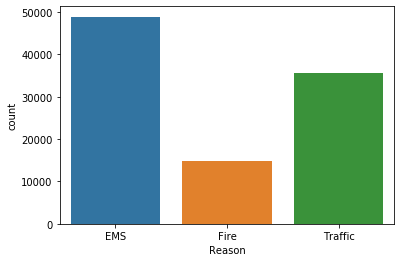

In [11]:
sns.countplot(x = 'Reason', data = df)

So, the most common Reason for a 911 is EMS.

___
** Now focus on time information. Convert the column from strings to DateTime objects **

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Create 3 new columns called Hour, Month and Day of week based off of the timeStamp column **

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['timeStamp'].apply(lambda x: dmap[x.dayofweek])

** Create a countplot of the Day of Week column with the hue based off of the Reason column. **

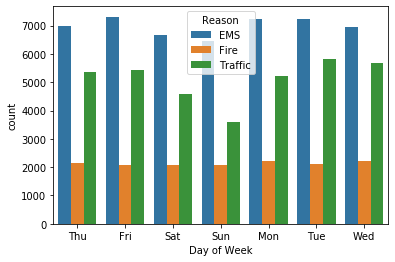

In [14]:
sns.countplot(x = "Day of Week", data = df, hue = "Reason")

So, EMS and Fire reasons weakly depend on Day of Week. Traffic reasons depend on Day of Week (we can see, that the smallest number is for Sunday, what makes sense, because it's weekend and people less use cars).

**Now do the same for Month:**

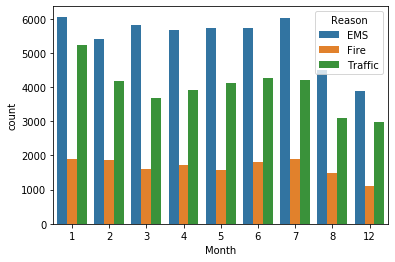

In [15]:
sns.countplot(x = "Month", data = df, hue = "Reason")

There is missing data for some Month (9, 10, 11). Will try to fill in this information by plotting the information in another way.

** Create a gropuby object called byMonth, where we will group the DataFrame by the month column. **

In [16]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Create a simple plot off of the dataframe indicating the count of calls per month. **

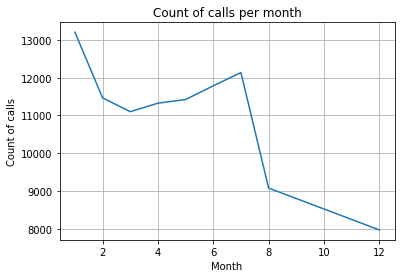

In [17]:
plt.plot(byMonth.index, byMonth['lat'])
plt.xlabel('Month')
plt.ylabel('Count of calls')
plt.title("Count of calls per month")
plt.grid()

** Use seaborn's lmplot() to create a linear fit on the number of calls per month. **

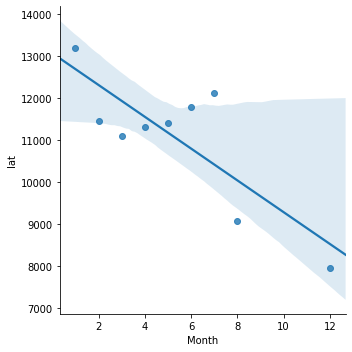

In [18]:
sns.lmplot( x = 'Month', y = 'lat', data = byMonth.reset_index())

** Create a new column called 'Date' that contains the date from the timeStamp column. **

In [19]:
df['Data'] = df['timeStamp'].apply(lambda x: x.date())

** Now groupby this Date column and create a plot of counts of 911 calls.**

Text(0, 0.5, 'Counts')

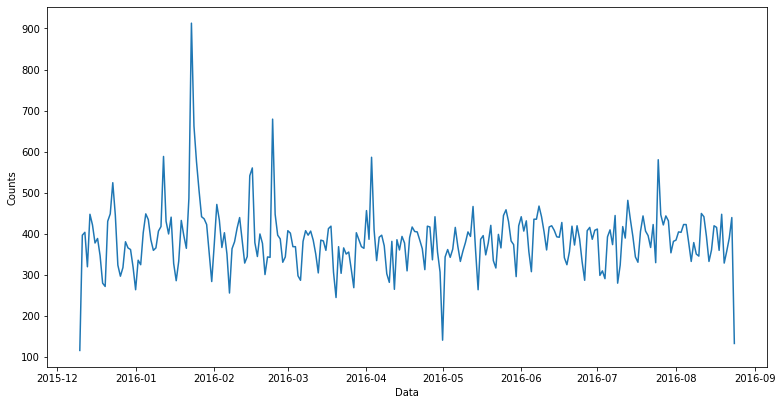

In [21]:
byData = df.groupby('Data').count()
fig = plt.figure(figsize = (10,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(byData.reset_index()['Data'], byData['lat'])
axes.set_xlabel('Data')
axes.set_ylabel('Counts')

** Create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Fire')

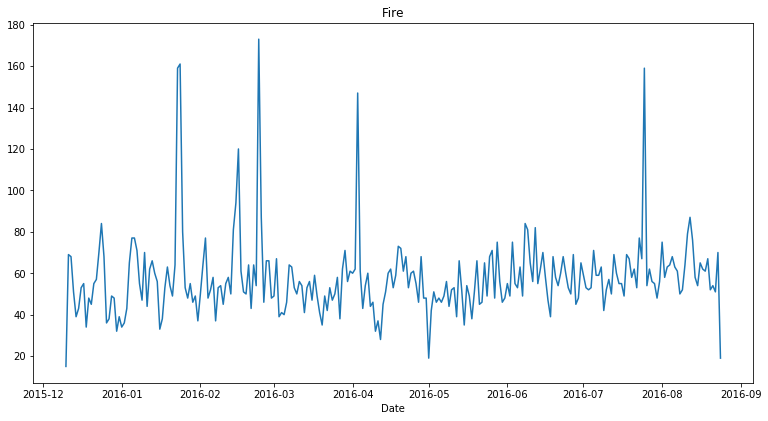

In [22]:
byData = df[df['Reason'] == 'Fire'].groupby('Data').count()
fig = plt.figure(figsize = (10,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(byData.index, byData['lat'])
axes.set_xlabel('Date')
axes.set_title('Fire')

Text(0.5, 1.0, 'Traffic')

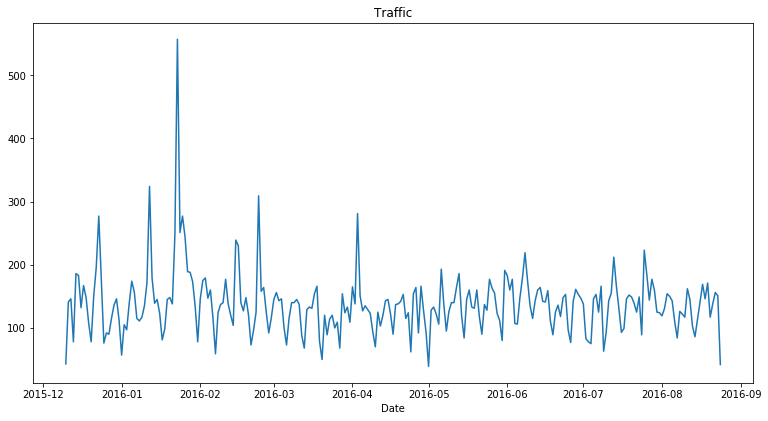

In [23]:
byData = df[df['Reason'] == 'Traffic'].groupby('Data').count()
fig = plt.figure(figsize = (10,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(byData.index, byData['lat'])
axes.set_xlabel('Date')
axes.set_title('Traffic')

Text(0.5, 1.0, 'EMS')

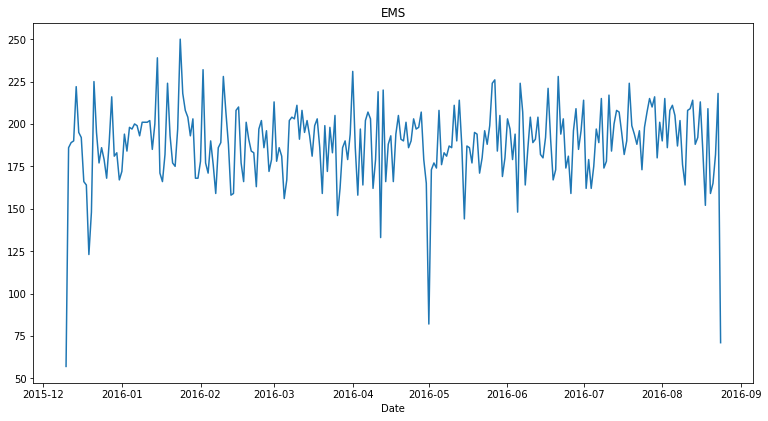

In [24]:
byData = df[df['Reason'] == 'EMS'].groupby('Data').count()
fig = plt.figure(figsize = (10,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(byData.index, byData['lat'])
axes.set_xlabel('Date')
axes.set_title('EMS')

____
** Create heatmap with seaborn and data. **

In [25]:
data = df.groupby(by = ['Day of Week', 'Hour']).count().unstack(level = -1)['Reason']
data.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


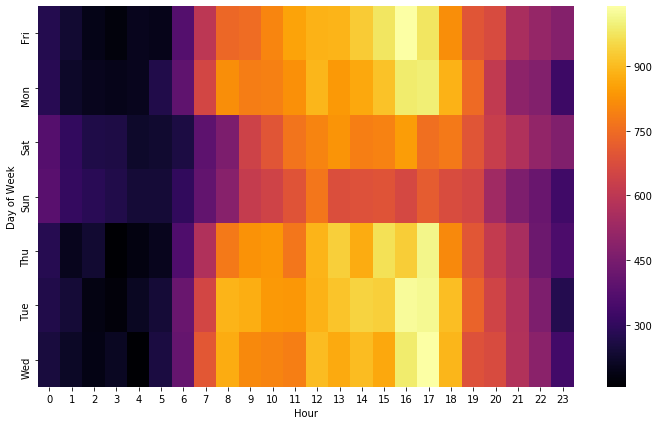

In [26]:
figure = plt.figure(figsize = (12,7))
sns.heatmap(data, cmap = 'inferno')

The smallest number of calls is for 0 - 5 hours (it makes sense, because it's midnight).

** Create a clustermap using this DataFrame. **

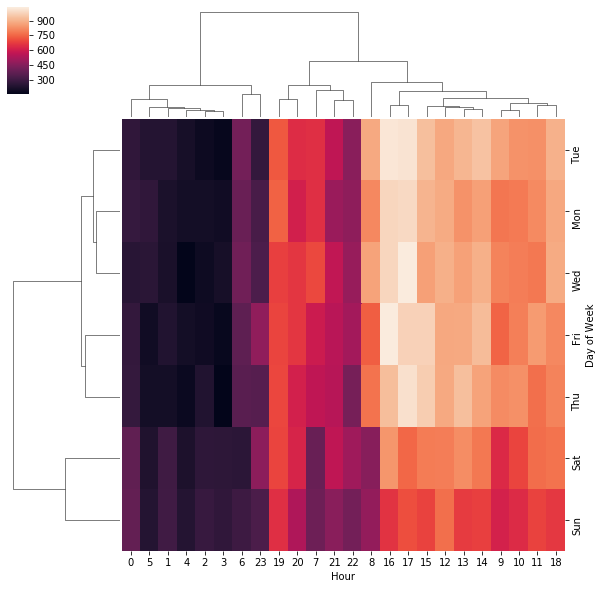

In [27]:
sns.clustermap(data)

There is a bit more information than for heatmap. The highest numbers of calls are for 9-18 hours, lower number of calls is for 19 - 22 hours, smallest for 0 - 6. It makes sense, because the highest numbers of calls are for working hours, lower for evening, smallest for midnight.
The lowest numbers of calls is for weekend, so it makes sense too (people are at home and there are less traffic and EMS accidents).

** Repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [28]:
data_2 = df.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
data_2.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


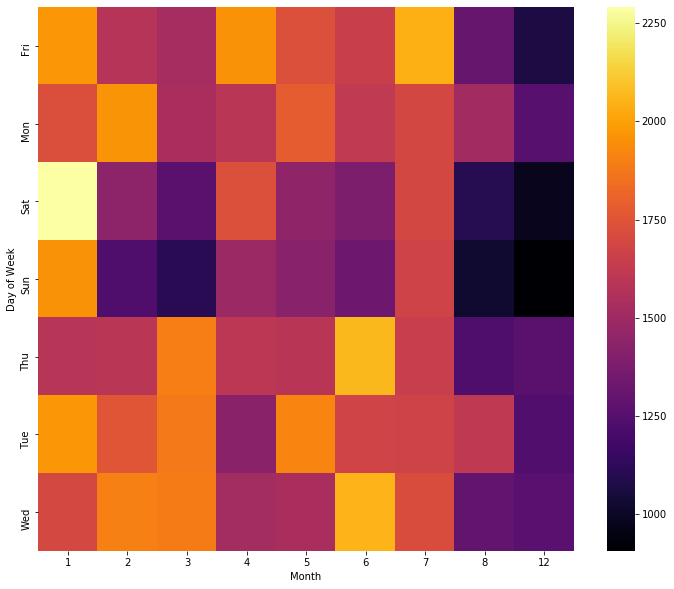

In [29]:
figure = plt.figure(figsize = (12,10))
sns.heatmap(data_2, cmap = 'inferno')

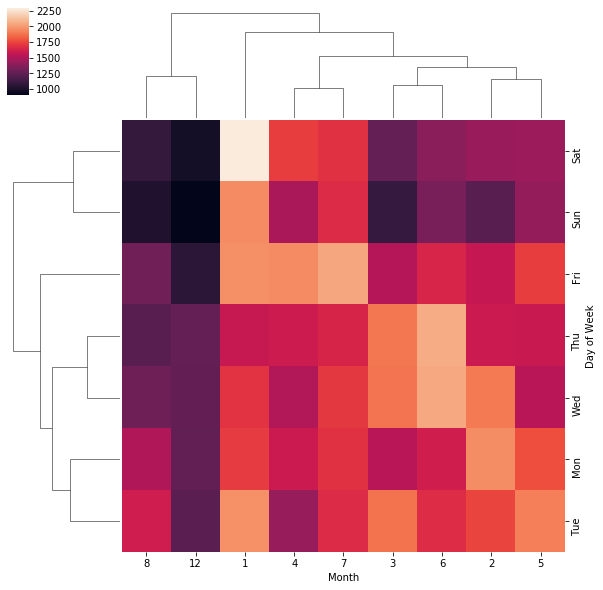

In [30]:
sns.clustermap(data_2)

We can fill in missing information for months 9, 10, 11 based on this clustermap, heatmap and lmplot: those months will be in the group with 8, 12 months and will have small number of calls.